# Dashboard App

Este es el proceso para desarrollar un dasboard dinámico e interactivo usando los recursos de la librería de [Plottly](https://plotly.com/python/) con los cuales se creara una aplicación [Dash](https://dash.plotly.com/) la cual se compone de dos partes. La primera parte es el `layout`, que describe el diseño de la aplicación. La segunda parte describe la interactividad de la aplicación.

Esta aplicación Dash permite visualizar y analizar datos crediticios de un banco alemán. Incluye dos gráficos principales: un histograma que muestra la distribución del monto del crédito por propósito y un gráfico de pastel que muestra la distribución de los propósitos de crédito seleccionados por el usuario.

## Instalacion de Librerias

1. Instalamos las librerias de los recursos que vamos a utlizar:

In [4]:
import sys
!{sys.executable} -m pip install dash
!{sys.executable} -m pip install dash-renderer
!{sys.executable} -m pip install dash-html-components
!{sys.executable} -m pip install dash-core-components
!{sys.executable} -m pip install dash-bootstrap-components

  Obtaining dependency information for dash-bootstrap-components from https://files.pythonhosted.org/packages/cc/72/dda12d6c6a9a2901f5549cea05c7f180e89dee6fb8c5f5f037ce7101ba24/dash_bootstrap_components-1.6.0-py3-none-any.whl.metadata
  Using cached dash_bootstrap_components-1.6.0-py3-none-any.whl.metadata (5.2 kB)
Using cached dash_bootstrap_components-1.6.0-py3-none-any.whl (222 kB)


2. Ahora importamos las librerias necesarias para construir la aplicación Dash:

In [5]:
import dash
import dash_core_components as dcc 
import dash_html_components as html
import dash_bootstrap_components as dbc
import plotly.express as px
import pandas as pd 
from dash.dependencies import Input,Output
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.io as pio
import plotly.figure_factory as ff
pd.set_option('display.max_columns',None)

## Exploravcion de los datos
Para este proyecto vamos a utilizar este conjunto de datos el cual contiene datos sobre el riesgo crediticio de los clientes de una institución financiera

1. Carga el conjunto de datos en un DataFrame de pandas

In [6]:
df= pd.read_csv('../Data/german_credit.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


## Diseño y maquetación de la aplicacion Dash
1. Se creo un par de [archivos](../assets/CSS/) para el diseño de la aplicacion

In [ ]:
# Inicialización de la Aplicación
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Layout de la Aplicación
app.layout = html.Div([
    
    html.Div([
        html.H1('German Bank'),
        html.Img(src='../assets/img/BankAppLogo2.png')
    ], className = 'banner'),

     html.Div([
        html.Div([
            html.P('Selecciona el historial del crédito', className='fix_label', style={'color':'black', 'margin-top': '2px'}),
            dcc.RadioItems(
                id='credit_history',
                labelStyle={'display': 'inline-block', 'margin-right': '20px'},
                options=[
                    {'label': 'Critical account', 'value': 'critical account/ other credits existing (not at this bank)'},
                    {'label': 'Existing credits', 'value': 'existing credits paid back duly till now'},
                    {'label': 'No credits taken', 'value': 'no credits taken/ all credits paid back duly'},
                    {'label': 'Delay in paying', 'value': 'delay in paying off in the past'}
                ],
                value='existing credits paid back duly till now',
                style={'text-align':'center', 'color':'black'}, 
                className='dcc_compon'
            ),
        ], className='create_container2 five columns', style={'margin-bottom': '20px'}),
    ], className='row flex-display'),

    html.Div([
        html.Div([
            dcc.Graph(id='my_graph', figure={})
        ], className='create_container2'),

        html.Div([
            dcc.Graph(id='pie_graph', figure={})
        ], className='create_container2')
    ], className='row flex-display'),

], id='mainContainer', style={'display':'flex', 'flex-direction':'column'})

# Callbacks
@app.callback(
    Output('my_graph', 'figure'),
    [Input('credit_history', 'value')]
)
def update_graph(value):
    filtered_df = df[df['credit_history'] == value]
    
    fig = go.Figure()

    # Agregar las barras para cada categoría de 'purpose'
    for purpose, data in filtered_df.groupby('purpose'):
        fig.add_trace(go.Histogram(
            x=data['purpose'],
            y=data['credit_amount'],
            name=str(purpose)
            #marker_color="#02aaf8" if purpose == 'NO' else "#023368"
        ))

    # Configura el diseño del gráfico
    fig.update_layout(
        title="Distribución del Monto del Crédito por Propósito",
        xaxis_title="Propósito",
        yaxis_title="Monto del Crédito",
        barmode='group',
        bargap=0.1
    )

    return fig

@app.callback(
    Output('pie_graph', 'figure'),
    [Input('credit_history', 'value')]
)
def update_graph_pie(value):
    filtered_df = df[df['credit_history'] == value]
    purpose_counts = filtered_df['purpose'].value_counts()
    
    fig2 = go.Figure()

    fig2.add_trace(go.Pie(
        labels=purpose_counts.index,
        values=purpose_counts.values,
        hole=0.2
       # marker=dict(colors=["#02aaf8", "#023368", "#abcdef", "#123456"])  # Colores personalizados opcionales
    ))

    fig2.update_layout(
        title=f'Distribución del Monto del Crédito por Propósito',
        width=600,
        height=400
    )

    return fig2

# Ejecutar la Aplicación
if __name__ == '__main__':
    app.run_server(debug=True)

En lo anterior se hizo lo siguiente:

1. **Layout de la Aplicación**
    * Definir el layout de la aplicación, incluyendo un encabezado con título e imagen, un control de `RadioItems` para seleccionar el historial de crédito, y dos gráficos (barras e histograma).
2. **Callbacks**
    * Definir los callbacks para actualizar los gráficos en función del valor seleccionado en RadioItems.
    * `update_graph`: Actualiza el histograma según el historial de crédito seleccionado.
    * `update_graph_pie`: Actualiza el gráfico de pastel según el historial de crédito seleccionado.
3. **Ejecutar la Aplicación**
    * Ejecutar la aplicación en modo de depuración.


### Resultado final de la aplicacion de Dash
Esta es la vista preliminar de la aplicación al momento de ejecutarla:

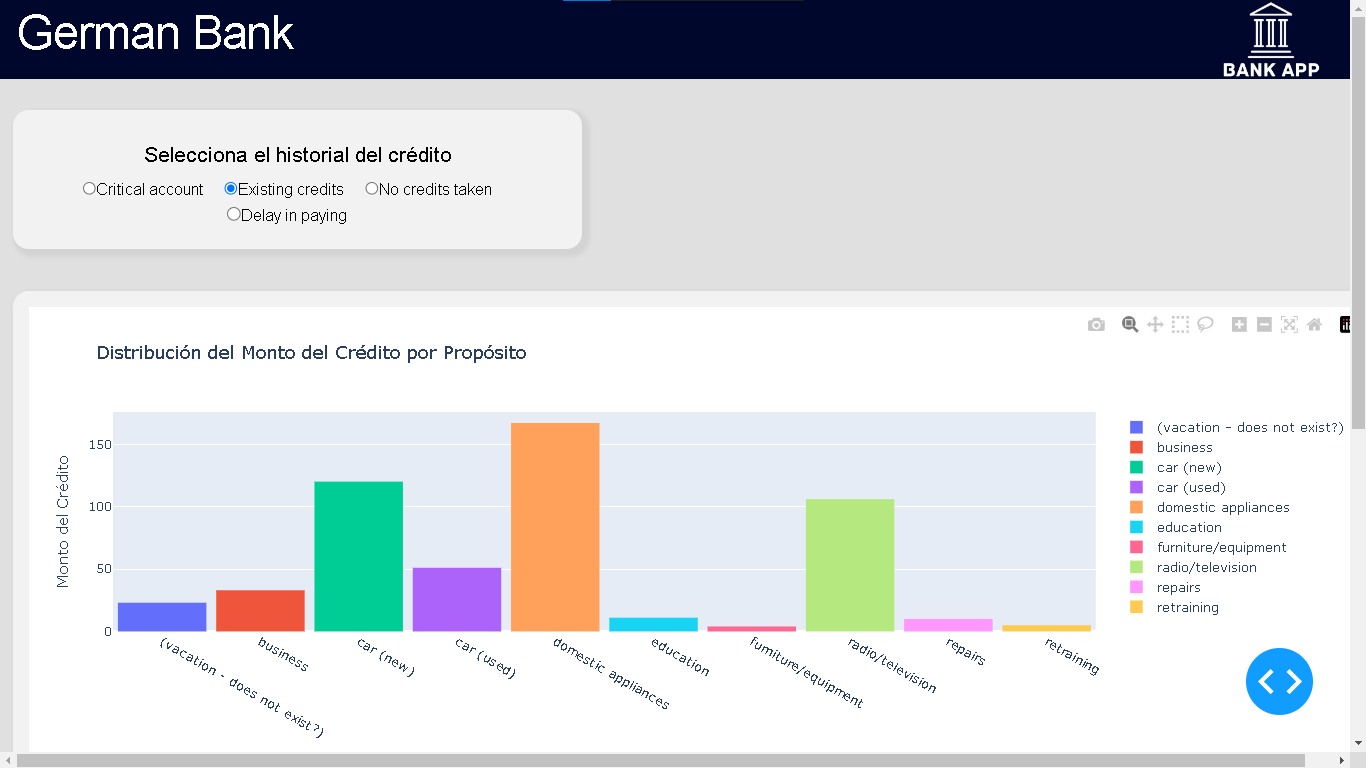

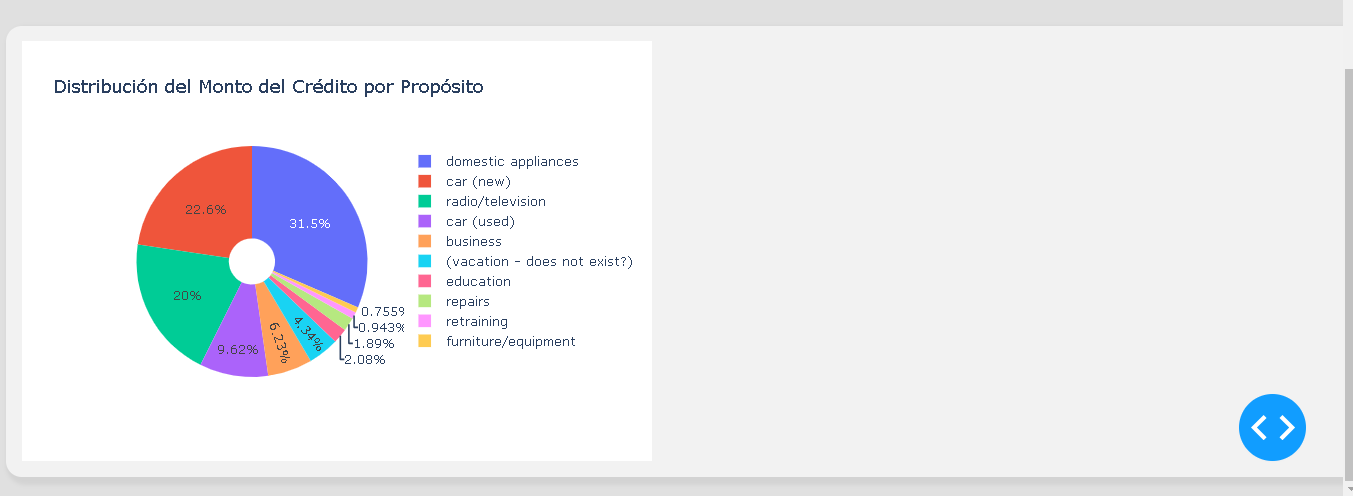


## Conclusión
La aplicación Dash proporciona una interfaz dinamica, interactiva y visualmente atractiva para analizar datos crediticios de un banco alemán. A través de gráficos dinámicos, los usuarios pueden explorar la distribución del monto del crédito por propósito y el historial de crédito de los clientes. La implementación de histogramas y gráficos de pastel permiten la comprensión rápida y efectiva de los patrones en los datos, facilitando la toma de decisiones informadas.

### Beneficios Principales:
* Interactividad: Esta aplicacion tiene capacidad de seleccionar diferentes categorías de historial de crédito permite a los usuarios ajustar los gráficos gracias a las foncionalidades de la libreria de Plotly, lo que ofrece una visión más profunda y personalizada de los datos.

* Visualización Clara: La representación visual de los datos mediante gráficos intuitivos ayuda a identificar tendencias y anomalías que podrían pasar desapercibidas en tablas de datos tradicionales.

* Flexibilidad y Personalización: La aplicación puede ser fácilmente adaptada para incluir nuevas características, gráficos adicionales y diferentes conjuntos de datos, lo que la hace una herramienta versátil para diversas necesidades analíticas.

* Facilidad de Uso: Con una interfaz simple y controles claros, los usuarios pueden navegar y utilizar la aplicación sin necesidad de conocimientos técnicos avanzados.

En resumen, esta aplicación Dash es una herramienta para la visualización y análisis de datos crediticios, ofreciendo a los usuarios la capacidad de explorar y entender sus datos de manera interactiva y eficiente. Esta herramienta puede continuar proporcionando valor significativo a los analistas de datos y a las instituciones financieras.